In [1]:
!pip install seaborn
!pip install plotly
!pip install folium
!pip install --upgrade nbformat



In [2]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium


In [4]:

#Loading the Data from a specific location 
df = pd.read_csv(r"C:\Users\bhupender kumar\Downloads\housing_data.csv")


In [5]:

df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [8]:
#Cleaning the Data by fill the missing value
def fill_missing_values(df):
    # Handling missing values by filling null values
    # Filling missing values in numerical columns with the mean
    num_cols = df.select_dtypes(include='number').columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
    
    # Filling missing values in object columns with the mode
    obj_cols = df.select_dtypes(include='object').columns
    df[obj_cols] = df[obj_cols].fillna(df[obj_cols].mode().iloc[0])

    return df

df1 = fill_missing_values(df)


In [9]:
df1.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [35]:
# Get summary statistics of numerical features
print(df.describe())

# Check for missing values
print(df.isnull().sum())

        Unnamed: 0  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    57.623288   10516.828082     6.099315     5.575342   
std     421.610009    34.664304    9981.264932     1.382997     1.112799   
min       0.000000     0.000000    1300.000000     1.000000     1.000000   
25%     364.750000    42.000000    7553.500000     5.000000     5.000000   
50%     729.500000    63.000000    9478.500000     6.000000     5.000000   
75%    1094.250000    79.000000   11601.500000     7.000000     6.000000   
max    1459.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ..

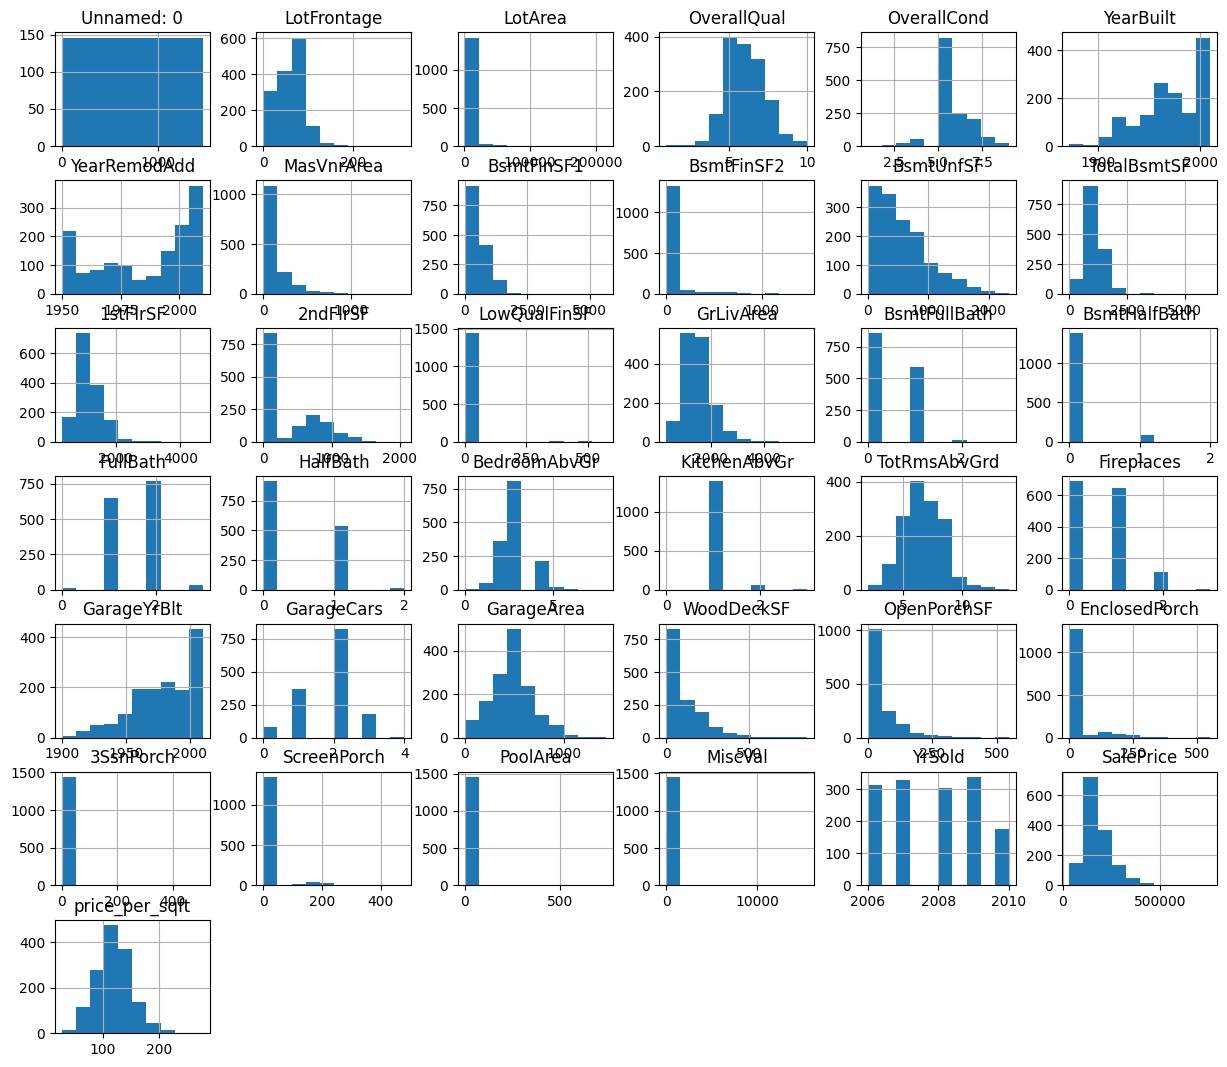

In [40]:
# Visualize distributions of numerical features
df.hist(figsize=(15, 13))
plt.show()


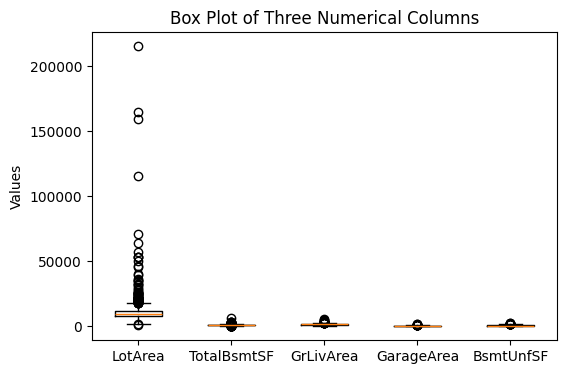

In [25]:
# Specify the five numerical columns to plot
numerical_columns = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea','BsmtUnfSF']

# Create a box plot using Matplotlib
plt.figure(figsize=(6, 4))
plt.boxplot(df[numerical_columns].values, labels=numerical_columns)
plt.title("Box Plot of Three Numerical Columns")
plt.ylabel("Values")
plt.show()


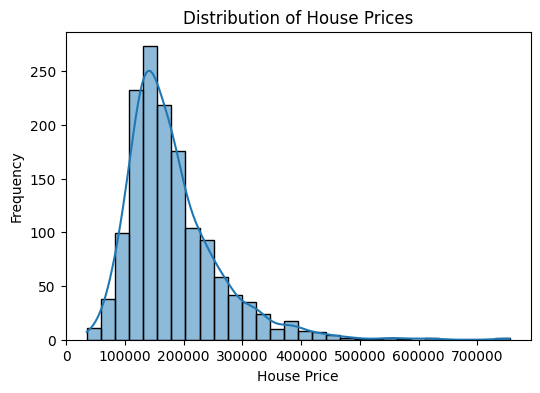

In [8]:
#Univariate Analysis
# Histogram for house prices
plt.figure(figsize=(6, 4))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()


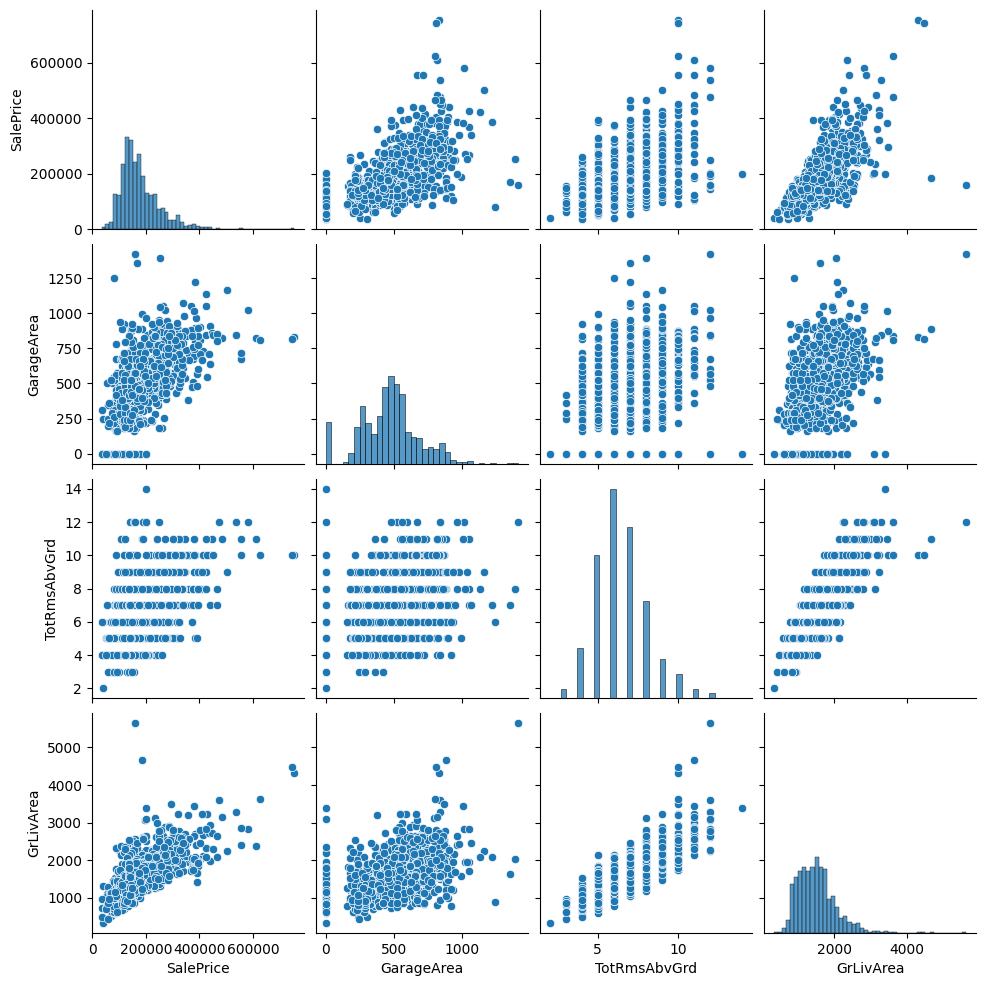

In [9]:

#Multivariate Analysis
# Scatterplot matrix for selected features
sns.pairplot(df[['SalePrice', 'GarageArea', 'TotRmsAbvGrd', 'GrLivArea']])
plt.show()



In [10]:
#Feature Engineering
# Create a new feature 'price_per_sqft'
df['price_per_sqft'] = df['SalePrice'] / df['GrLivArea']
print(df['price_per_sqft'])


0       121.929825
1       143.819334
2       125.139978
3        81.537566
4       113.739763
           ...    
1455    106.253795
1456    101.302460
1457    113.888889
1458    131.841373
1459    117.436306
Name: price_per_sqft, Length: 1460, dtype: float64


In [11]:
#Geospatial Analysis
# Visualize house prices on a map
fig = px.scatter_mapbox(df, lat='LotFrontage', lon='LotArea', color='SalePrice',
                        size='GrLivArea', hover_name='MSSubClass',
                        mapbox_style='carto-positron', title='House Prices Distribution on Map')
fig.show()

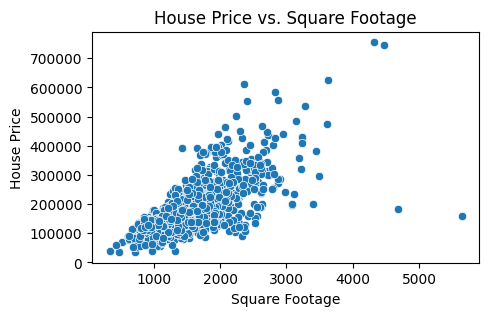

In [12]:
#Feature Engineering and Size Impact
# Scatterplot for house prices vs. square footage
plt.figure(figsize=(5, 3))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('House Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.show()



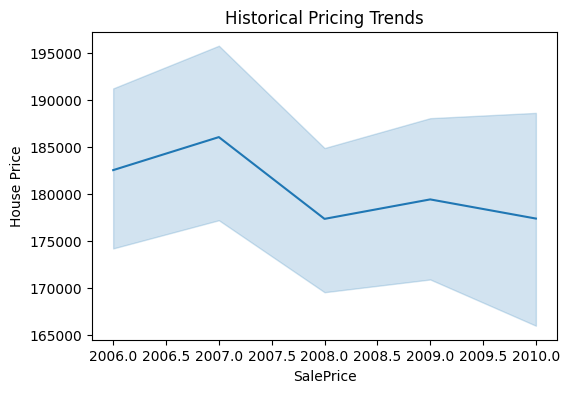

In [13]:
#Market Trends and Historical Pricing
# Line plot for historical pricing trends
plt.figure(figsize=(6, 4))
sns.lineplot(x='YrSold', y='SalePrice', data=df)
plt.title('Historical Pricing Trends')
plt.xlabel('SalePrice')
plt.ylabel('House Price')
plt.show()




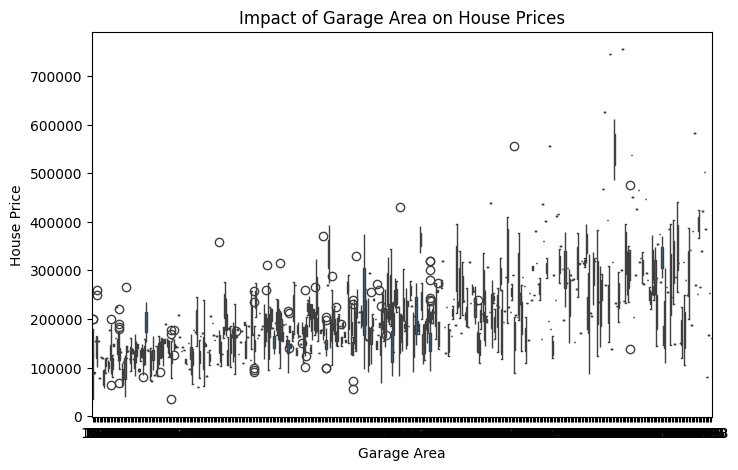

In [17]:
#Customer Preferences and Amenities
# Boxplot for house prices with/without a GarageArea
plt.figure(figsize=(8, 5))
sns.boxplot(x='GarageArea', y='SalePrice', data=df)
plt.title('Impact of Garage Area on House Prices')
plt.xlabel('Garage Area')
plt.ylabel('House Price')
plt.show()

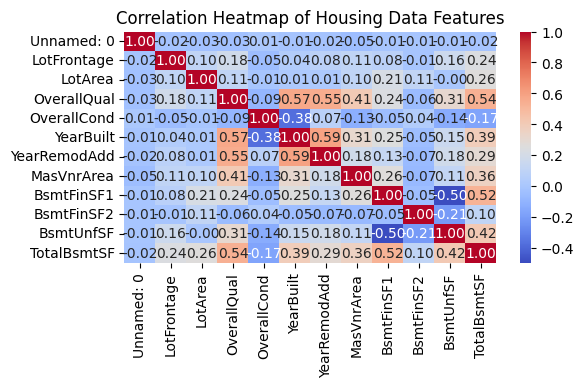

In [29]:
# Encode non-numeric columns if they contain categorical data
df_numeric = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = df_numeric.corr().iloc[:12, :12]

# Plot heatmap of correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Housing Data Features")
plt.show()


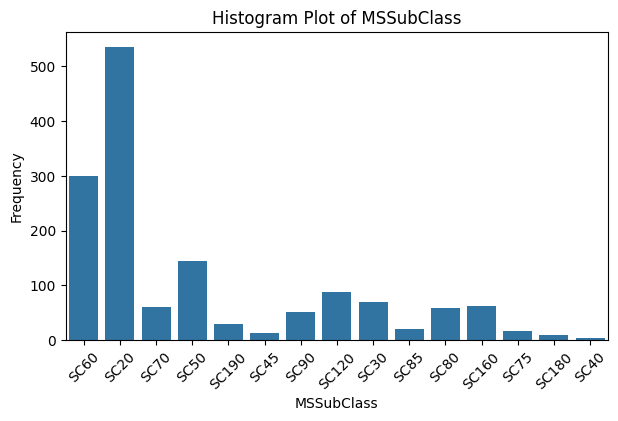

In [27]:
# Specify the categorical column to plot
category_column = 'MSSubClass'

# Create a bar plot using Seaborn
plt.figure(figsize=(7, 4))
sns.countplot(x=category_column, data=df)
plt.title("Histogram Plot of {}".format(category_column))
plt.xlabel(category_column)
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
